# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('loan_default.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())

Dataset Shape: (255347, 18)

First few rows:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes     

Default Distribution:
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

Numerical Variables Summary:
                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018     

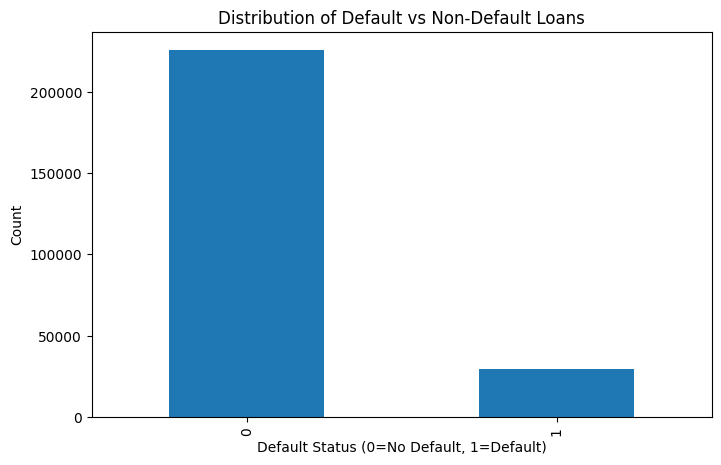

In [4]:
# 1. Check default distribution
print("Default Distribution:")
print(df['Default'].value_counts(normalize=True) * 100)

# 2. Basic statistics for numerical variables
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

print("\nNumerical Variables Summary:")
print(df[numerical_cols].describe())

# 3. Visualize default distribution
plt.figure(figsize=(8, 5))
df['Default'].value_counts().plot(kind='bar')
plt.title('Distribution of Default vs Non-Default Loans')
plt.xlabel('Default Status (0=No Default, 1=Default)')
plt.ylabel('Count')
plt.show()

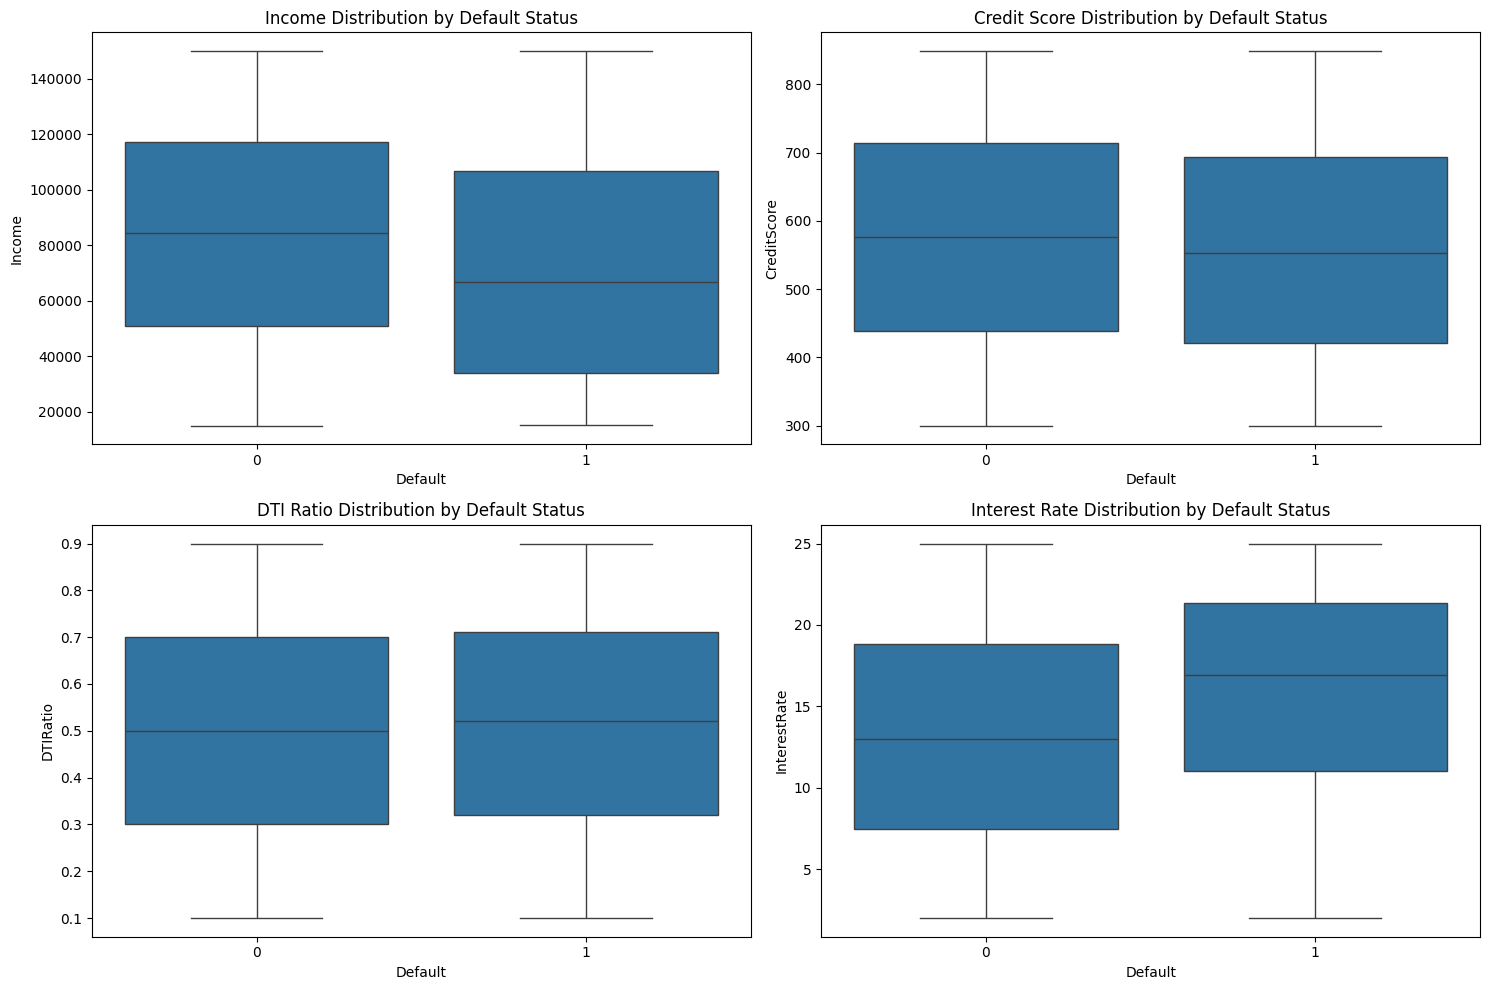


Mean values by default status:
               Income  CreditScore  DTIRatio  InterestRate
Default                                                   
0        83899.165995   576.232270  0.498602     13.176994
1        71844.722659   559.286143  0.512467     15.896227


In [5]:
# Create box plots for key numerical variables
plt.figure(figsize=(15, 10))

# Create subplots for key financial indicators
plt.subplot(2, 2, 1)
sns.boxplot(x='Default', y='Income', data=df)
plt.title('Income Distribution by Default Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title('Credit Score Distribution by Default Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.title('DTI Ratio Distribution by Default Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='Default', y='InterestRate', data=df)
plt.title('Interest Rate Distribution by Default Status')

plt.tight_layout()
plt.show()

# Calculate mean values for each group
print("\nMean values by default status:")
print(df.groupby('Default')[['Income', 'CreditScore', 'DTIRatio', 'InterestRate']].mean())

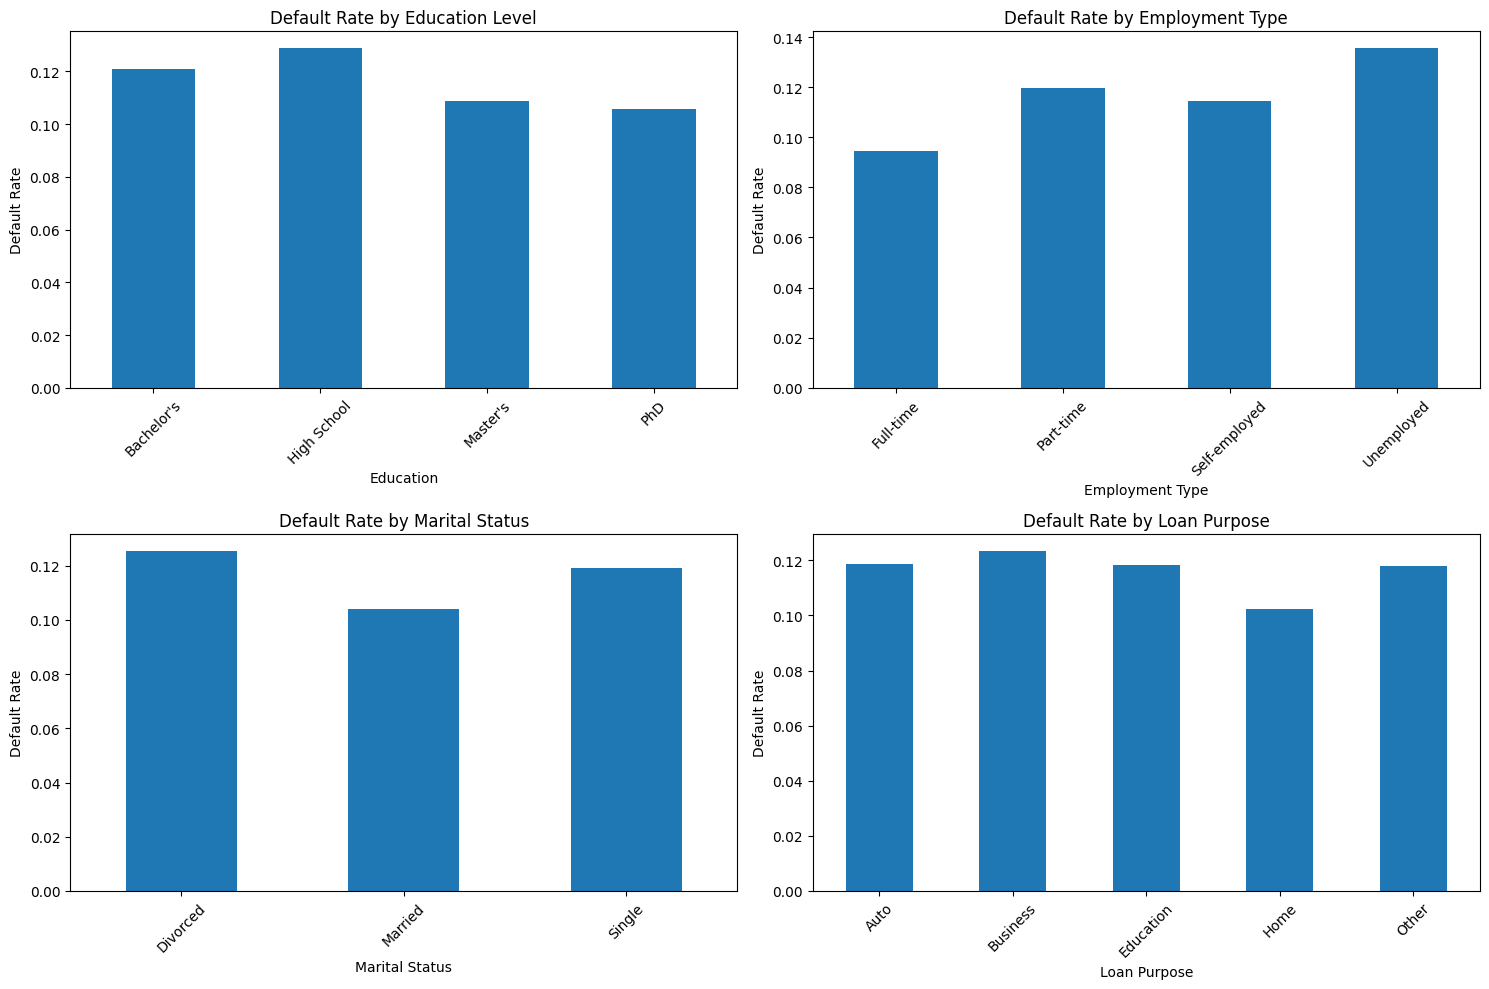


Default Rates by Category:

Education Default Rates:
Education
High School    0.128789
Bachelor's     0.121011
Master's       0.108717
PhD            0.105860
Name: Default, dtype: float64

EmploymentType Default Rates:
EmploymentType
Unemployed       0.135529
Part-time        0.119652
Self-employed    0.114620
Full-time        0.094634
Name: Default, dtype: float64

MaritalStatus Default Rates:
MaritalStatus
Divorced    0.125328
Single      0.119124
Married     0.103972
Name: Default, dtype: float64

LoanPurpose Default Rates:
LoanPurpose
Business     0.123260
Auto         0.118814
Education    0.118381
Other        0.117885
Home         0.102348
Name: Default, dtype: float64


In [6]:
# Set up the figure size for all plots
plt.figure(figsize=(15, 10))

# 1. Education and Default Rate
plt.subplot(2, 2, 1)
df.groupby('Education')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Education Level')
plt.xlabel('Education')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 2. Employment Type and Default Rate
plt.subplot(2, 2, 2)
df.groupby('EmploymentType')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 3. Marital Status and Default Rate
plt.subplot(2, 2, 3)
df.groupby('MaritalStatus')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# 4. Loan Purpose and Default Rate
plt.subplot(2, 2, 4)
df.groupby('LoanPurpose')['Default'].mean().plot(kind='bar')
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the actual percentages
print("\nDefault Rates by Category:")
for category in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']:
    print(f"\n{category} Default Rates:")
    print(df.groupby(category)['Default'].mean().sort_values(ascending=False))

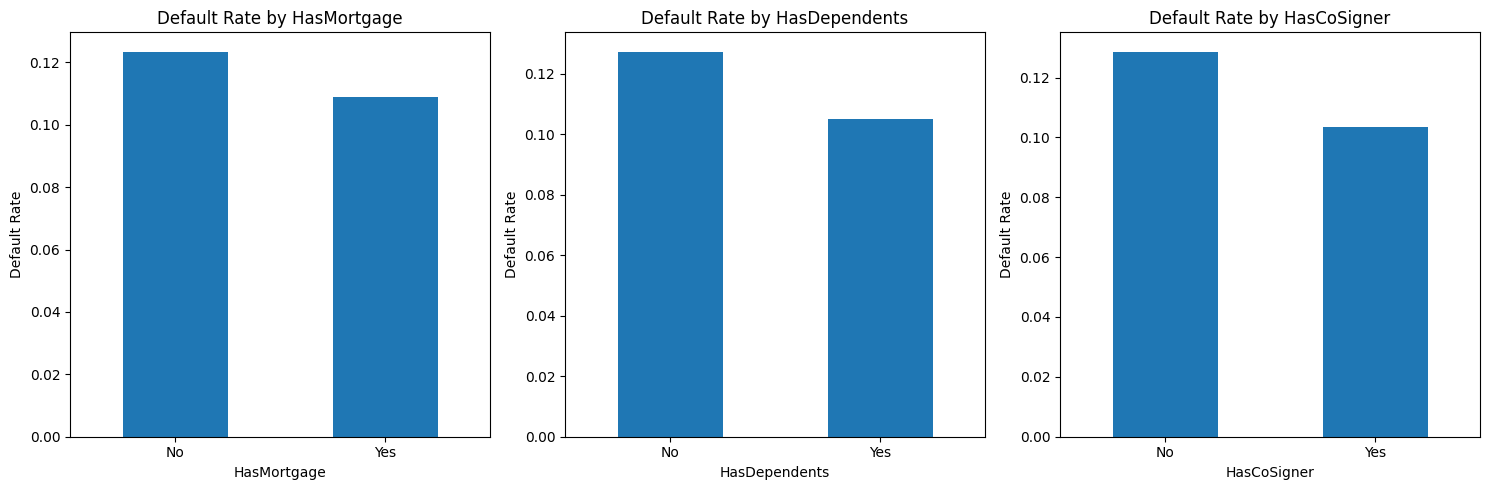


Default Rates for Binary Features:

HasMortgage Default Rates:
HasMortgage
No     0.123451
Yes    0.108806
Name: Default, dtype: float64

HasDependents Default Rates:
HasDependents
No     0.127244
Yes    0.105024
Name: Default, dtype: float64

HasCoSigner Default Rates:
HasCoSigner
No     0.128661
Yes    0.103601
Name: Default, dtype: float64


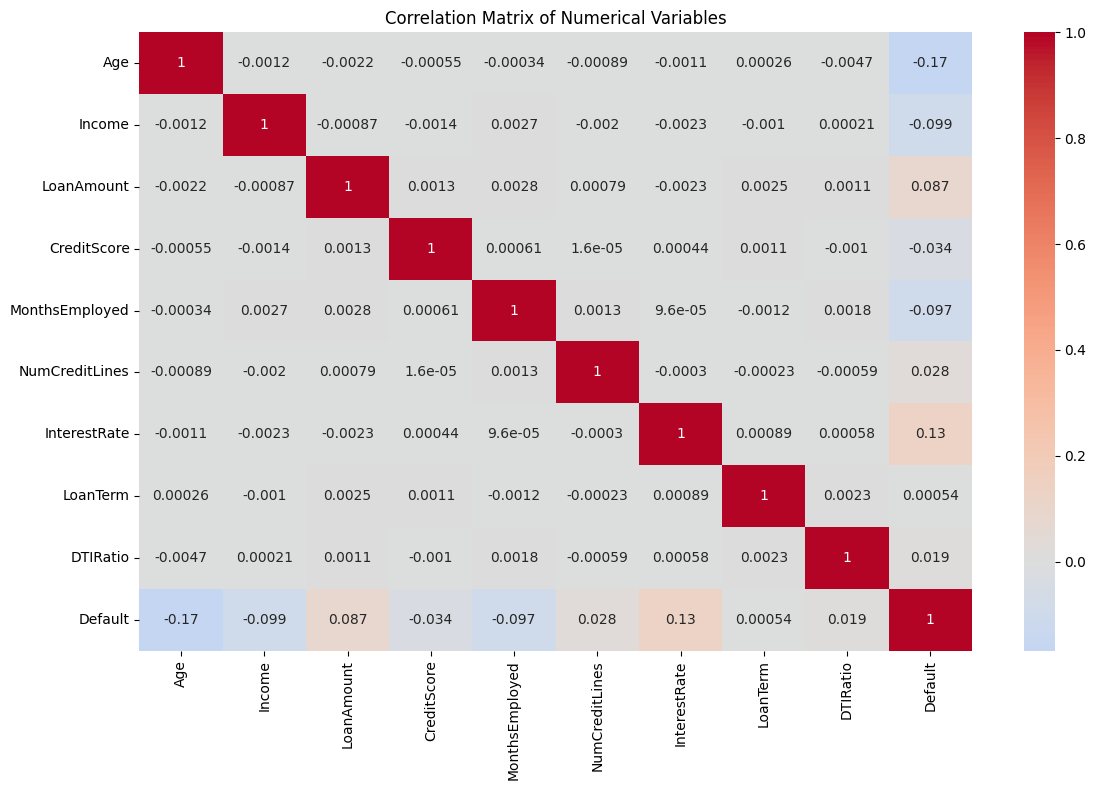

In [7]:
# Set up the figure size for binary features analysis
plt.figure(figsize=(15, 5))

# Analyze binary features
binary_features = ['HasMortgage', 'HasDependents', 'HasCoSigner']

# Create subplots for binary features
for i, feature in enumerate(binary_features, 1):
    plt.subplot(1, 3, i)
    df.groupby(feature)['Default'].mean().plot(kind='bar')
    plt.title(f'Default Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Default Rate')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Print the actual percentages for binary features
print("\nDefault Rates for Binary Features:")
for feature in binary_features:
    print(f"\n{feature} Default Rates:")
    print(df.groupby(feature)['Default'].mean().sort_values(ascending=False))

# Create correlation matrix for numerical variables
numerical_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Feature Engineering & Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# 1. Feature Engineering
def engineer_features(df):
    # Create copy to avoid modifying original data
    df_new = df.copy()
    
    # Create new features
    df_new['Debt_to_Income'] = df_new['LoanAmount'] / df_new['Income']
    df_new['Monthly_Payment'] = (df_new['LoanAmount'] * (df_new['InterestRate']/1200)) / (1 - (1 + df_new['InterestRate']/1200)**(-df_new['LoanTerm']))
    df_new['Payment_to_Income'] = df_new['Monthly_Payment'] / (df_new['Income']/12)
    
    # Risk Score based on Credit Score
    df_new['Credit_Risk'] = pd.cut(df_new['CreditScore'], 
                                  bins=[0, 580, 670, 740, 800, 850],
                                  labels=['Very Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
    
    return df_new

In [11]:
# 2. Preprocessing
def preprocess_data(df):
    # Handle categorical variables
    # Convert binary features
    binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
    for col in binary_cols:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    
    # Convert categorical features using Label Encoding
    cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    
    # Scale numerical features
    scaler = StandardScaler()
    num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
                'Debt_to_Income', 'Monthly_Payment', 'Payment_to_Income']
    
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df, scaler

In [12]:
# 3. Split the data
def split_data(df, target_col='Default'):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Split with stratification to handle any class imbalance
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=42, 
                                                        stratify=y)
    return X_train, X_test, y_train, y_test

In [13]:
# Main preprocessing pipeline
def main_preprocessing():
    # Load data
    df = pd.read_csv('loan_default.csv')
    
    # Engineer features
    df_engineered = engineer_features(df)
    
    # Preprocess data
    df_processed, scaler = preprocess_data(df_engineered)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(df_processed)
    
    # Print shapes to verify
    print("Training set shape:", X_train.shape)
    print("Testing set shape:", X_test.shape)
    print("\nFeature names:", X_train.columns.tolist())
    
    return X_train, X_test, y_train, y_test, scaler

In [14]:
# Run the preprocessing pipeline
X_train, X_test, y_train, y_test, scaler = main_preprocessing()

Training set shape: (204277, 21)
Testing set shape: (51070, 21)

Feature names: ['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Debt_to_Income', 'Monthly_Payment', 'Payment_to_Income', 'Credit_Risk']
